<a href="https://colab.research.google.com/github/NarasimhaMurthy2003/Stock_Price_Prediction-using-LSTM/blob/main/Stock_Prediction_using_Lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
import keras
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check TensorFlow version
print("TensorFlow Version: ", tf.__version__)

TensorFlow Version:  2.15.0


In [26]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)
from sklearn.preprocessing import MinMaxScaler

In [27]:
aapl_data=yf.download("AAPL",start,end)

[*********************100%%**********************]  1 of 1 completed


In [28]:
aapl_data.isnull().sum()


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [29]:
scaler = MinMaxScaler(feature_range=(0,1))
aapl_data_scaled = scaler.fit_transform(aapl_data['Close'].values.reshape(-1,1))

In [30]:
X = []
y = []

for i in range(60, len(aapl_data_scaled)):
    X.append(aapl_data_scaled[i-60:i, 0])
    y.append(aapl_data_scaled[i, 0])

In [31]:
train_size = int(len(X) * 0.8)
test_size = len(X) - train_size

X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [32]:
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [33]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, AdditiveAttention, Permute, Reshape, Multiply

model = Sequential()

# Adding LSTM layers with return_sequences=True
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(units=50, return_sequences=True))

In [34]:
# Adding self-attention mechanism
# The attention mechanism
attention = AdditiveAttention(name='attention_weight')
# Permute and reshape for compatibility
model.add(Permute((2, 1)))
model.add(Reshape((-1, X_train.shape[1])))
attention_result = attention([model.output, model.output])
multiply_layer = Multiply()([model.output, attention_result])
# Return to original shape
model.add(Permute((2, 1)))
model.add(Reshape((-1, 50)))

# Adding a Flatten layer before the final Dense layer
model.add(tf.keras.layers.Flatten())

# Final Dense layer
model.add(Dense(1))

# Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)

In [35]:
from keras.layers import BatchNormalization

# Adding Dropout and Batch Normalization
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2)

Epoch 1/100
5/5 [==============================] - 5s 298ms/step - loss: 0.6812 - val_loss: 0.2006
Epoch 2/100
5/5 [==============================] - 0s 62ms/step - loss: 0.4006 - val_loss: 0.1753
Epoch 3/100
5/5 [==============================] - 0s 61ms/step - loss: 0.3838 - val_loss: 0.1914
Epoch 4/100
5/5 [==============================] - 0s 63ms/step - loss: 0.3345 - val_loss: 0.1807
Epoch 5/100
5/5 [==============================] - 0s 61ms/step - loss: 0.3253 - val_loss: 0.1789
Epoch 6/100
5/5 [==============================] - 0s 63ms/step - loss: 0.3140 - val_loss: 0.1739
Epoch 7/100
5/5 [==============================] - 0s 62ms/step - loss: 0.3088 - val_loss: 0.1748
Epoch 8/100
5/5 [==============================] - 0s 67ms/step - loss: 0.2945 - val_loss: 0.1682
Epoch 9/100
5/5 [==============================] - 0s 62ms/step - loss: 0.2924 - val_loss: 0.1613
Epoch 10/100
5/5 [==============================] - 0s 77ms/step - loss: 0.2913 - val_loss: 0.1608
Epoch 11/100
5/5 [

In [38]:
from keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
5/5 [==============================] - 0s 74ms/step - loss: 0.0458 - val_loss: 0.0330
Epoch 2/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0487 - val_loss: 0.0304
Epoch 3/100
5/5 [==============================] - 0s 64ms/step - loss: 0.0466 - val_loss: 0.0260
Epoch 4/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0491 - val_loss: 0.0210
Epoch 5/100
5/5 [==============================] - 0s 65ms/step - loss: 0.0453 - val_loss: 0.0243
Epoch 6/100
5/5 [==============================] - 0s 67ms/step - loss: 0.0457 - val_loss: 0.0289
Epoch 7/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0423 - val_loss: 0.0265
Epoch 8/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0371 - val_loss: 0.0219
Epoch 9/100
5/5 [==============================] - 0s 68ms/step - loss: 0.0438 - val_loss: 0.0247
Epoch 10/100
5/5 [==============================] - 0s 61ms/step - loss: 0.0451 - val_loss: 0.0224
Epoch 11/100
5/5 [=

In [39]:
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, TensorBoard, CSVLogger

# Callback to save the model periodically
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True, monitor='val_loss')

# Callback to reduce learning rate when a metric has stopped improving
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5)

# Callback for TensorBoard
tensorboard = TensorBoard(log_dir='./logs')

# Callback to log details to a CSV file
csv_logger = CSVLogger('training_log.csv')

# Combining all callbacks
callbacks_list = [early_stopping, model_checkpoint, reduce_lr, tensorboard, csv_logger]

# Fit the model with the callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=25, validation_split=0.2, callbacks=callbacks_list)

Epoch 1/100
5/5 [==============================] - 1s 98ms/step - loss: 0.0292 - val_loss: 0.0198 - lr: 0.0010
Epoch 2/100
3/5 [=================>............] - ETA: 0s - loss: 0.0276

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5/5 [==============================] - 0s 72ms/step - loss: 0.0310 - val_loss: 0.0233 - lr: 0.0010
Epoch 3/100
5/5 [==============================] - 0s 87ms/step - loss: 0.0339 - val_loss: 0.0169 - lr: 0.0010
Epoch 4/100
5/5 [==============================] - 0s 70ms/step - loss: 0.0312 - val_loss: 0.0160 - lr: 0.0010
Epoch 5/100
5/5 [==============================] - 0s 69ms/step - loss: 0.0359 - val_loss: 0.0194 - lr: 0.0010
Epoch 6/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0281 - val_loss: 0.0244 - lr: 0.0010
Epoch 7/100
5/5 [==============================] - 0s 63ms/step - loss: 0.0345 - val_loss: 0.0202 - lr: 0.0010
Epoch 8/100
5/5 [==============================] - 0s 70ms/step - loss: 0.0264 - val_loss: 0.0172 - lr: 0.0010
Epoch 9/100
5/5 [==============================] - 0s 70ms/step - loss: 0.0266 - val_loss: 0.0173 - lr: 0.0010
Epoch 10/100
5/5 [==============================] - 0s 62ms/step - loss: 0.0239 - val_loss: 0.0169 - lr: 1.0000e-04
Epoch 11

In [40]:
X_test = np.array(X_test)
y_test = np.array(y_test)

# Ensure X_test is reshaped similarly to how X_train was reshaped
# This depends on how you preprocessed the training data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Now evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)
print("Test Loss: ", test_loss)

2/2 [==============================] - 0s 15ms/step - loss: 0.0145
Test Loss:  0.014496996998786926


In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Making predictions
y_pred = model.predict(X_test)

# Calculating MAE and RMSE
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Mean Absolute Error: ", mae)
print("Root Mean Square Error: ", rmse)

2/2 [==============================] - 1s 15ms/step
Mean Absolute Error:  0.10382804031478801
Root Mean Square Error:  0.12040347343241882


In [42]:
data = yf.download('AAPL', period='60d', interval='1d')

# Select 'Close' price and scale it
closing_prices = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(closing_prices)

# Predict the next 4 days iteratively
predicted_prices = []
current_batch = scaled_data[-60:].reshape(1, 60, 1)  # Most recent 60 days

for i in range(4):  # Predicting 4 days
    # Get the prediction (next day)
    next_prediction = model.predict(current_batch)

    # Reshape the prediction to fit the batch dimension
    next_prediction_reshaped = next_prediction.reshape(1, 1, 1)

    # Append the prediction to the batch used for predicting
    current_batch = np.append(current_batch[:, 1:, :], next_prediction_reshaped, axis=1)

    # Inverse transform the prediction to the original price scale
    predicted_prices.append(scaler.inverse_transform(next_prediction)[0, 0])

print("Predicted Stock Prices for the next 4 days: ", predicted_prices)

[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 27ms/step


1/1 [==============================] - 0s 26ms/step
Predicted Stock Prices for the next 4 days:  [183.02814, 181.73712, 180.10817, 179.16946]


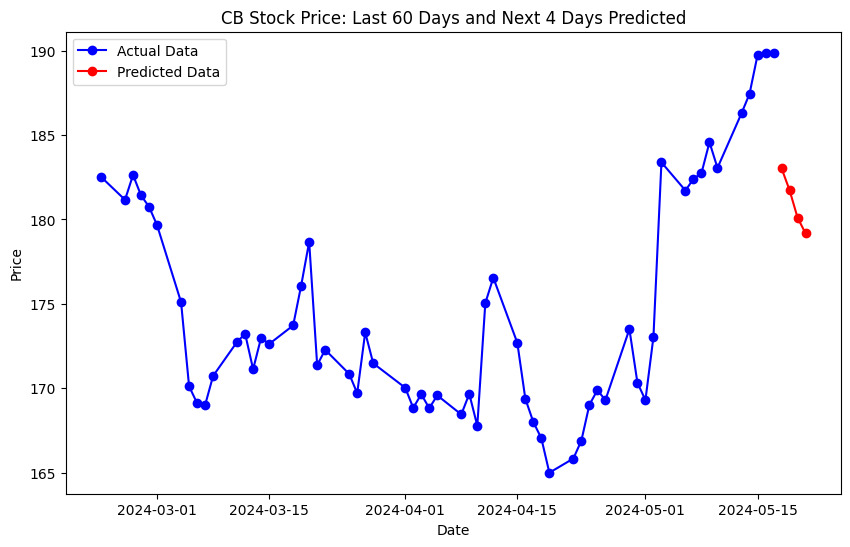

In [43]:
last_date = data.index[-1]
next_day = last_date + pd.Timedelta(days=1)
prediction_dates = pd.date_range(start=next_day, periods=4)

# Adding predictions to the DataFrame
predicted_data = pd.DataFrame(index=prediction_dates, data=predicted_prices, columns=['Close'])

# Combining both actual and predicted data
combined_data = pd.concat([data['Close'], predicted_data['Close']])
combined_data = combined_data[-64:] # Last 60 days of actual data + 4 days of predictions

# Plotting the actual data
plt.figure(figsize=(10,6))
plt.plot(data.index[-60:], data['Close'][-60:], linestyle='-', marker='o', color='blue', label='Actual Data')

# Plotting the predicted data
plt.plot(prediction_dates, predicted_prices, linestyle='-', marker='o', color='red', label='Predicted Data')

plt.title("CB Stock Price: Last 60 Days and Next 4 Days Predicted")
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()